In this lab, you will explore an example of multi-class classification using neural networks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

### 2.0 Multi-class Classification

Neural Networks are often used to classify data. Examples are neural networks:

take in photos and classify subjects in the photos as {dog,cat,horse,other}
take in a sentence and classify the 'parts of speech' of its elements: {noun, verb, adjective etc..}
A network of this type will have multiple units in its final layer. Each output is associated with a category. When an input example is applied to the network, the output with the highest value is the category predicted. If the output is applied to a softmax function, the output of the softmax will provide probabilities of the input being in each category.

In this lab you will see an example of a building a multiclass network in Tensorflow. We will then take a look at how the neural network makes its predictions.

Let's start by creating a four-class data set.

In [15]:
#make 4-class dataset for classification
classes=4
m=100
centers=[[-5,2],[-2,2],[1,2],[5,-2]]
std=1.0
X_train,y_train=make_blobs(n_samples=m,centers=centers,cluster_std=std,random_state=30)

In [7]:
def plt_mc_data(ax, X, y, classes,  class_labels=None, map=plt.cm.Paired, 
                legend=False, size=50, m='o', equal_xy = False):
    """ Plot multiclass data. Note, if equal_xy is True, setting ylim on the plot may not work """
    for i in range(classes):
        idx = np.where(y == i)
        col = len(idx[0])*[i]
        label = class_labels[i] if class_labels else "c{}".format(i)
        #ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
        #            c=col, vmin=0, vmax=map.N, cmap=map,
        #            s=size, label=label)
        ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
                    color=map(col), vmin=0, vmax=map.N, 
                    s=size, label=label)
    if legend: ax.legend()
    if equal_xy: ax.axis("equal")

In [8]:
def plt_mc(X_train,y_train,classes,centers,std):
    css=np.unique(y_train)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    fig.canvas.toolbar_visible=False
    fig.canvas.header_visible=False
    fig.canvas.footer_visible=False
    plt_mc_data(ax,X_train,y_train,classes,map=dkcolors_map, legend=True,size=50,equal_xy=False)
    ax.set_title('Multiclass Data')
    ax.set_xlabel('x0')
    ax.set_ylabel('x1')
    plt.show()

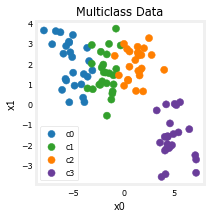

In [9]:
plt_mc(X_train,y_train,classes, centers, std=std)

Each dot represents a training example. The axis (x0,x1) are the inputs and the color represents the class the example is associated with. Once trained, the model will be presented with a new example, (x0,x1), and will predict the class.

While generated, this data set is representative of many real-world classification problems. There are several input features (x0,...,xn) and several output categories. The model is trained to use the input features to predict the correct output category.

In [12]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 Model

This lab will use a 2-layer network as shown. Unlike the binary classification networks, this network has four outputs, one for each class. Given an input example, the output with the highest value is the predicted class of the input.

Below is an example of how to construct this network in Tensorflow. Notice the output layer uses a linear rather than a softmax activation. While it is possible to include the softmax in the output layer, it is more numerically stable if linear outputs are passed to the loss function during training. If the model is used to predict probabilities, the softmax can be applied at that point.

In [18]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model=Sequential(
    [
        Dense(2,activation='relu',name='L1'),
    Dense(4,activation='linear',name='L2')
    ]
)

The statements below compile and train the network. Setting from_logits=True as an argument to the loss function specifies that the output activation was linear rather than a softmax.

In [19]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)
model.fit(X_train,y_train,epochs=200)

Epoch 1/200


2022-08-14 21:25:26.651714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 2s 11ms/step - loss: 1.3913
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 1.3474
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3161
Epoch 4/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2832
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.2525
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2215
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1902
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1538
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1175
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0730
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 1.0322
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9871
Epoch 13/200
4/4 [==============================] - 0s 7ms/step - loss: 

4/4 [==============================] - 0s 6ms/step - loss: 0.3328
Epoch 105/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3325
Epoch 106/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3320
Epoch 107/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3295
Epoch 108/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3244
Epoch 109/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3222
Epoch 110/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3203
Epoch 111/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3188
Epoch 112/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3182
Epoch 113/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3175
Epoch 114/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3168
Epoch 115/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3159
Epoch 116/200
4/4 [==============================] - 0

In [30]:
x_min, x_max = X_train[:, 0].min()- 0.5, X_train[:, 0].max()+0.5
y_min,y_max=X_train[:,1].min()-0.5,X_train[:,1].max()+0.5
h=max(x_max-x_min, y_max-y_min)/100
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),
                 np.arange(y_min,y_max,h))
points=np.c_[xx.ravel(),yy.ravel()]

In [51]:
points[:10]

array([[-8.4 , -4.11],
       [-8.24, -4.11],
       [-8.08, -4.11],
       [-7.92, -4.11],
       [-7.76, -4.11],
       [-7.6 , -4.11],
       [-7.44, -4.11],
       [-7.28, -4.11],
       [-7.12, -4.11],
       [-6.96, -4.11]])

In [61]:
#Plot a multi-class categorical decision boundary
# This version handles a non-vector prediction (adds a for-loop over points)
def plot_cat_decision_boundary_mc(ax, X, predict , class_labels=None, legend=False, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min()- 0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()- 0.5, X[:, 1].max()+0.5
    h = max(x_max-x_min, y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    print('Z',Z[0])
    print('Z',Z[31])
    Z = Z.reshape(xx.shape)
    #print('Z',Z[0])
    #print('Z',Z[31])
    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')

In [62]:
def plt_cat_mc(X_train, y_train, model, classes):
    #make a model for plotting routines to call
    model_predict = lambda Xl: np.argmax(model.predict(Xl),axis=1)

    fig,ax = plt.subplots(1,1, figsize=(3,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
 
    #add the original data to the decison boundary
    plt_mc_data(ax, X_train,y_train, classes, map=dkcolors_map, legend=True)
    #plot the decison boundary. 
    plot_cat_decision_boundary_mc(ax, X_train, model_predict, vector=True)
    ax.set_title("model decision boundary")

    plt.xlabel(r'$x_0$');
    plt.ylabel(r"$x_1$"); 
    plt.show()

165/165 [==============================] - 0s 2ms/step
Z 0
Z 0


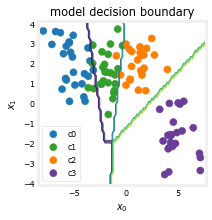

In [63]:
plt_cat_mc(X_train, y_train, model, classes)

Above, the decision boundaries show how the model has partitioned the input space. This very simple model has had no trouble classifying the training data. How did it accomplish this? Let's look at the network in more detail.

Below, we will pull the trained weights from the model and use that to plot the function of each of the network units. Further down, there is a more detailed explanation of the results. You don't need to know these details to successfully use neural networks, but it may be helpful to gain more intuition about how the layers combine to solve a classification problem.

In [64]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

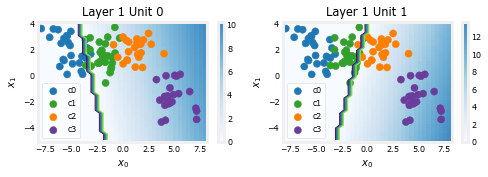

In [65]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

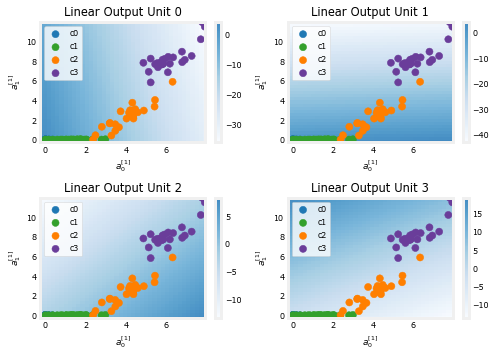

In [67]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.zeros_like(X_train)
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

Explanation

Layer 1 

These plots show the function of Units 0 and 1 in the first layer of the network. The inputs are (
x
0
,
x
1
) on the axis. The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph. Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. The contour lines in this graph show the transition point between the output, 
a
j
[
1
]
being zero and non-zero. Recall the graph for a ReLu : The contour line in the graph is the inflection point in the ReLu.

Unit 0 has separated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.
Unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2 ) will output a zero, while points below will output a value greater than zero. Let's see how this works out in the next layer!